Stephanie 

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR, DynamicVAR

In [9]:
youtube_econ = pd.read_csv("../data/youtube_econ.csv",index_col=0)

In [11]:
youtube_econ = youtube_econ.fillna(method='ffill')

In [15]:
youtube_econ.index = pd.to_datetime(youtube_econ.Date)

In [19]:
youtube_econ = youtube_econ.drop(['Date'], axis=1)

In [20]:
youtube_econ.head()

,views,likes,dislikes,comment_count,s&p_Open,s&p_High,s&p_Low,s&p_Close,s&p_Adj Close,s&p_Volume,...,etc_Low,etc_Close,etc_Adj Close,etc_Volume,btc_Open,btc_High,btc_Low,btc_Close,btc_Adj Close,btc_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-14,185435246,7637635,270876,691402,2577.750000,2579.659912,2566.560059,2578.870117,2578.870117,3.641760e+09,...,314.450012,334.720001,334.720001,256426287,6522.450195,6728.589844,6419.180176,6597.060059,6597.060059,634604991
2017-11-15,212445216,7601148,313577,709009,2569.449951,2572.840088,2557.449951,2564.620117,2564.620117,3.558890e+09,...,324.880005,331.200012,331.200012,171713343,6597.060059,7330.060059,6596.939941,7283.220215,7283.220215,922959468
2017-11-16,227365391,7886807,338755,735962,2572.949951,2590.090088,2572.949951,2585.639893,2585.639893,3.312710e+09,...,321.899994,330.320007,330.320007,157426941,7283.020020,7964.640137,7119.169922,7853.680176,7853.680176,1010130763
2017-11-17,193541711,7143580,341176,814596,2582.939941,2583.959961,2577.620117,2578.850098,2578.850098,3.300160e+09,...,325.829987,331.720001,331.720001,124992568,7853.680176,8000.189941,7534.700195,7699.950195,7699.950195,917599923
2017-11-18,196846875,8393717,322349,901370,2582.939941,2583.959961,2577.620117,2578.850098,2578.850098,3.300160e+09,...,326.829987,346.649994,346.649994,141724984,7699.950195,7857.520020,7458.899902,7780.910156,7780.910156,571121111


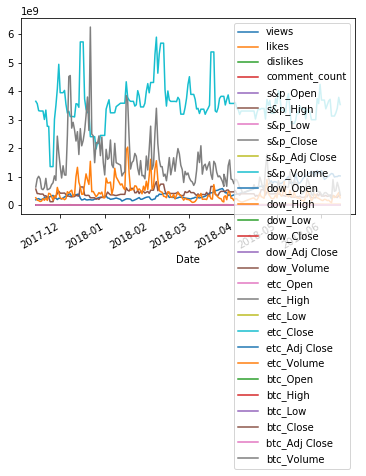

In [22]:
youtube_econ.plot()
plt.show()

In [16]:
model = VAR(youtube_econ)

results = model.fit(2)
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).